<a href="https://colab.research.google.com/github/PreTad/Medical-Appointment-No-Shows/blob/main/No_shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [114]:
data = pd.read_csv('/content/Medical Appointment No Shows.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# Data cleaning

In [116]:
# As seen on the above there is no missing values
data.duplicated().sum()

np.int64(0)

In [117]:
cat_cols = data.select_dtypes(include='object').columns
for cols in cat_cols:
  print(data[cols].unique())
  print('-'*20)

['F' 'M']
--------------------
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
--------------------
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
--------------------
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BE

Everything looks greate so far

In [118]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [119]:
# There is a little false data on age which is a negative value let's clean that up
display(data[data['Age'] <= 0])
data.drop(data[data['Age'] <= 0].index,inplace=True)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [120]:
# now check again
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [121]:
display(data[data['Age'] == 0])

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [122]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], errors='coerce').dt.date
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], errors='coerce').dt.date

In [123]:
# So now the Appointment day should be after or on the Schedule day, so let's check them
inconsistents_ = data[data['AppointmentDay'] < data['ScheduledDay']]
inconsistents_

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [124]:
# So there are around five rows with this problem so lets remove them
data.drop(inconsistents_.index, inplace=True)

In [125]:
data[data['AppointmentDay'] < data['ScheduledDay']]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


# Data analysis

array([[<Axes: title={'center': 'PatientId'}>,
        <Axes: title={'center': 'AppointmentID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Scholarship'}>,
        <Axes: title={'center': 'Hipertension'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Alcoholism'}>,
        <Axes: title={'center': 'Handcap'}>,
        <Axes: title={'center': 'SMS_received'}>]], dtype=object)

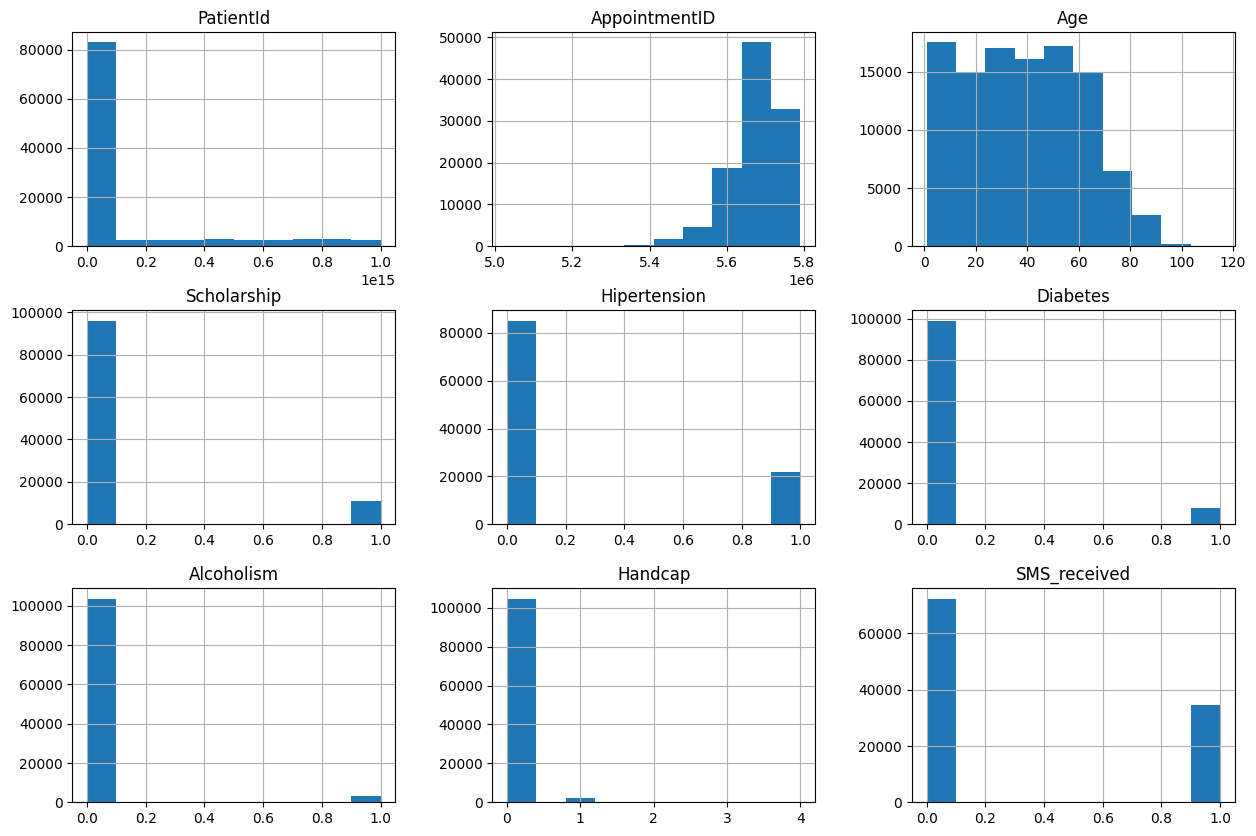

In [126]:
data.hist(figsize=(15,10))

In [127]:
# PatientID and The AppointmentId are not particularly insightful for analysis, and except age others are binary values (either yes or no) ,
# so here age is skewed to the right which shows large number of younger patients and few of older ones, but it is plausible since it is a healthcare dataset

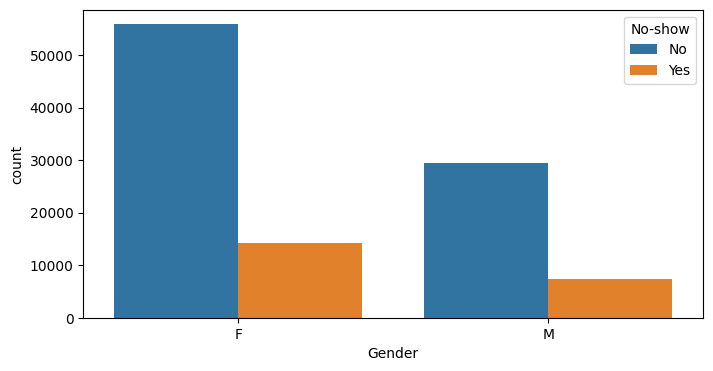

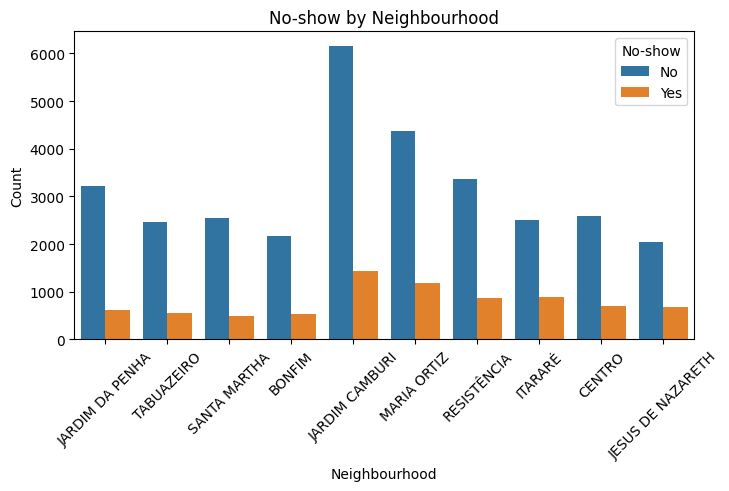

In [128]:
# Let's see a relationship between No-show and Gender
plt.figure(figsize=(8,4))
sbn.countplot(x= 'Gender',hue='No-show',data=data)
plt.show()

# And now No-show with the top 10 most Neighbourhoods
plt.figure(figsize=(8,4))
top_neighbourhoods = data['Neighbourhood'].value_counts().nlargest(10).index
sbn.countplot(x='Neighbourhood', data=data[data['Neighbourhood'].isin(top_neighbourhoods)], hue='No-show')
plt.xticks(rotation=45)
plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.title("No-show by Neighbourhood")
plt.show()

Here females hold the majority position in the dataset almost doubles of males, so the first graph is biased for the womens.
---
On the second graph the JARDIM CAMBURI holds the patients for both that show up and not for the appointment


In [129]:
# let's beauld a feature which is a waiting time between Scheduled and appointment time, and it's impact on the patients showed
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], errors='coerce')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], errors='coerce')
data['Waiting Time'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

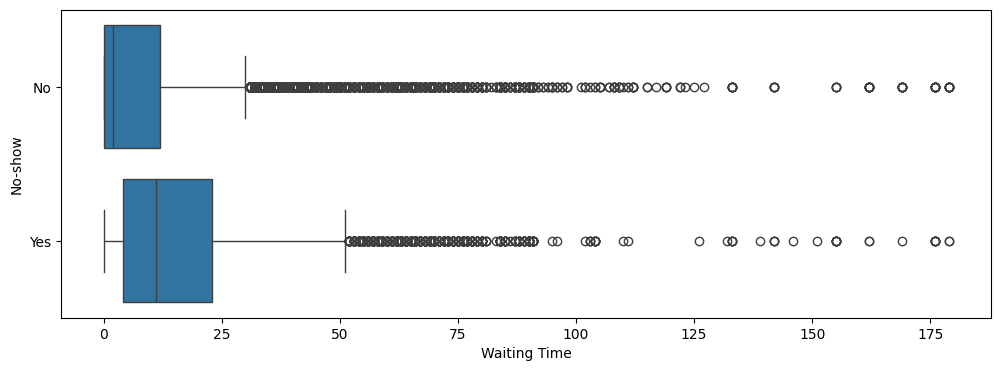

In [130]:
# Now it's impact
plt.figure(figsize=(12,4))
sbn.boxplot(x='Waiting Time',y='No-show',data=data)
plt.show()

In [131]:
# Here we can decide that despite lots of outliers, this box plot shows patients with
# longer waiting times are more likely to miss their appointments.

# Prediction


Here I am gonna use Gradient Booster and LogisticRegression and choose between them

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier
print(data.columns)
data = data.dropna()

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Waiting Time'],
      dtype='object')


In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['No-show'] = le.fit_transform(data['No-show'])
data['Gender'] = le.fit_transform(data['Gender'])

x = data[['Gender','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']]
y = data['No-show']
train_x,test_x,train_y ,test_y = train_test_split(x,y,test_size=0.3,random_state=42)

# Check if the values of the targeted feature are balanced or not
print(len(train_y[train_y == 1]))
print(len(train_y[train_y == 0]))

15340
59547


They are not, so...

In [134]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
train_x,train_y = ros.fit_resample(train_x,train_y)

# Check again
print(len(train_y[train_y == 1]))
print(len(train_y[train_y == 0]))

59547
59547


In [135]:
# Now we are good to go
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=400 ,
                                      learning_rate=0.05,
                                      random_state=42)
gb_model.fit(train_x, train_y)
gb_pred = gb_model.predict(test_x)
print(classification_report(test_y, gb_pred),accuracy_score(test_y, gb_pred))


              precision    recall  f1-score   support

           0       0.84      0.68      0.75     25760
           1       0.27      0.48      0.34      6335

    accuracy                           0.64     32095
   macro avg       0.55      0.58      0.55     32095
weighted avg       0.73      0.64      0.67     32095
 0.6389157189593394


In [136]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(train_x, train_y)
lr_pred = lr_model.predict(test_x)
print(classification_report(test_y, lr_pred),accuracy_score(test_y, lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74     25760
           1       0.26      0.48      0.33      6335

    accuracy                           0.62     32095
   macro avg       0.55      0.57      0.54     32095
weighted avg       0.72      0.62      0.66     32095
 0.62346159837981


The problem is values of the targeted value are not balanced,

In [137]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(64, activation='relu', input_shape=(train_x.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(test_x, test_y)
print(f"Test Accuracy: {accuracy}")

nn_pred = (model.predict(test_x) > 0.5).astype("int32")
print(classification_report(test_y, nn_pred))

Epoch 1/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.6200 - loss: 0.6699 - val_accuracy: 0.4266 - val_loss: 0.7996
Epoch 2/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6300 - loss: 0.6523 - val_accuracy: 0.2617 - val_loss: 0.8917
Epoch 3/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.6358 - loss: 0.6477 - val_accuracy: 0.2473 - val_loss: 0.9007
Epoch 4/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6363 - loss: 0.6457 - val_accuracy: 0.1409 - val_loss: 0.9933
Epoch 5/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6370 - loss: 0.6467 - val_accuracy: 0.1056 - val_loss: 1.0710
Epoch 6/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.6356 - loss: 0.6465 - val_accuracy: 0.1877 - val_loss: 0.9660
Epoch 7/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.6360 - loss: 0.6452 - val_accuracy: 0.2047 - val_loss: 0.9208
Epoch 8/10
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6402 - loss: 0